In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from orapMethod import *
from ExtendDT import ext_dt

In [2]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=7)

In [3]:
ccp_classifier = DecisionTreeClassifier(random_state=0)
path = ccp_classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_clfs = []
for ccp_alpha in ccp_alphas:
    ccp_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    ccp_clf.fit(X_train, y_train)
    ccp_clfs.append(ccp_clf)

In [4]:
base_dt = ccp_clfs[0]
ORAP_sequence = get_ORAP_sequence(base_dt)
remove_sequence = ORAP_sequence.removed
orap_clfs = []
for prune_list in remove_sequence:
    orap_clf = series_prune(base_dt, prune_list)
    orap_clfs.append(orap_clf)


[128 (d:13)] | Opting ===>
[128] ===> Ready |
[127 (d:13)] | Opting ===>
[127] ===> Ready |
[242 (d:12)] | Opting ===>
[242] ===> Ready |
[241 (d:12)] | Opting ===>
[241] ===> Ready |
[228 (d:12)] | Opting ===>
[228] ===> Ready |
[227 (d:12)] | Opting ===>
[227] ===> Ready |
[219 (d:12)] | Opting ===>
[219] ===> Ready |
[218 (d:12)] | Opting ===>
[218] ===> Ready |
[182 (d:12)] | Opting ===>
[182] ===> Ready |
[181 (d:12)] | Opting ===>
[181] ===> Ready |
[169 (d:12)] | Opting ===>
[169] ===> Ready |
[168 (d:12)] | Opting ===>
[168] ===> Ready |
[126 (d:12)] | Opting ===>
[126] ===> Ready |
[125 (d:12)] | Opting ===>
[125] ===> Ready |
[248 (d:11)] | Opting ===>
[248] ===> Ready |
[247 (d:11)] | Opting ===>
[247] ===> Ready |
[243 (d:11)] | Opting ===>
[243] ===> Ready |
[240 (d:11)] | Opting ===>
[240] ===> Ready |
[238 (d:11)] | Opting ===>
[238] ===> Ready |
[237 (d:11)] | Opting ===>
[237] ===> Ready |
[229 (d:11)] | Opting ===>
[229] ===> Ready |
[226 (d:11)] | Opting ===>
[226] =

In [5]:
orap_APD = [ext_dt(clf).get_APD() for clf in orap_clfs]
orap_train_scores = [clf.score(X_train, y_train) for clf in orap_clfs]
orap_test_scores = [clf.score(X_test, y_test) for clf in orap_clfs]

ccp_APD = [ext_dt(clf).get_APD() for clf in ccp_clfs]
ccp_train_scores = [clf.score(X_train, y_train) for clf in ccp_clfs]
ccp_test_scores = [clf.score(X_test, y_test) for clf in ccp_clfs]

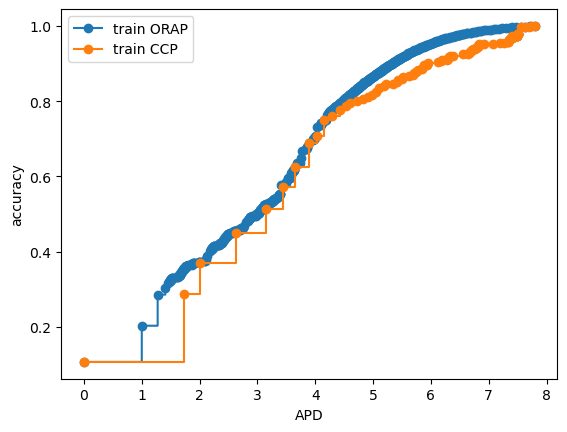

In [6]:
fig, ax = plt.subplots()
ax.set_xlabel("APD")
ax.set_ylabel("accuracy")
ax.plot(orap_APD, orap_train_scores, marker="o", label="train ORAP", drawstyle="steps-pre")
ax.plot(ccp_APD, ccp_train_scores, marker="o", label="train CCP", drawstyle="steps-pre")
_=ax.legend()



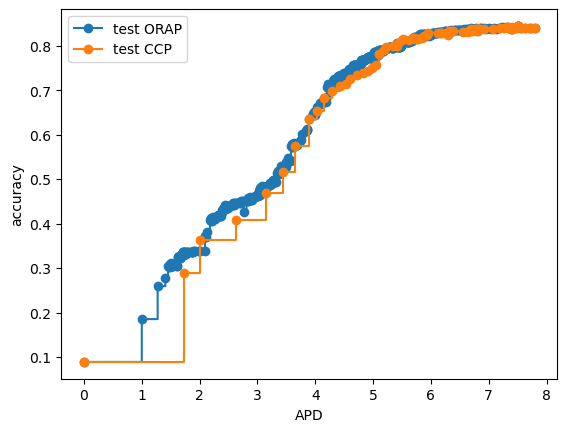

In [7]:
fig, ax = plt.subplots()
ax.set_xlabel("APD")
ax.set_ylabel("accuracy")
ax.plot(orap_APD, orap_test_scores, marker="o", label="test ORAP", drawstyle="steps-pre")
ax.plot(ccp_APD, ccp_test_scores, marker="o", label="test CCP", drawstyle="steps-pre")
_=ax.legend()